<a href="https://colab.research.google.com/drive/1LZ8HY1Y5HH0OSqmpHUkSzRE7HTzeMxQo" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 3 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [1]:
import requests


url_dict = {
    'sgd_data.csv': 'https://drive.usercontent.google.com/download?id=14UPDlsLd9sn0aVOCjslCgyB3AtQoYvnZ&export=download&authuser=0&confirm=t&uuid=ae3b4a91-9c34-42b0-8c90-d368456462d3&at=APZUnTWYXEnTwNQ08i_q89zDsaJv:1704950346746'
}


def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

In [2]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 3F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [18]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    predictions = np.dot(X, w)
    return np.mean((predictions - Y) ** 2)
    

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    return 2 * x * (np.dot(w, x) - y)


def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    losses = np.zeros(N_epochs)
    w = w_start.copy()

    for epoch in range(N_epochs):
        indices = np.random.permutation(len(Y))
        losses[epoch] = loss(X, Y, w)
        for j in indices:
            w -= eta * gradient(X[j], Y[j], w)   

    return w , losses

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [19]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [20]:
download_file('sgd_data.csv')

Start downloading...
Complete


In [21]:

load_data('sgd_data.csv')

data = load_data('sgd_data.csv')
X = data[:,:-1]
Y = data[:,-1]

ones = np.ones((len(X), 1))
X = np.hstack((ones, X))

w_start = np.array([0.001] * 5)
eta = np.exp(-15)
N_epochs = 800

w, losses = SGD(X, Y, w_start, eta, N_epochs)

print('w = ', w)

w =  [ -0.22718741  -5.94210739   3.94390866 -11.72383731   8.78567881]


## Problem 3G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

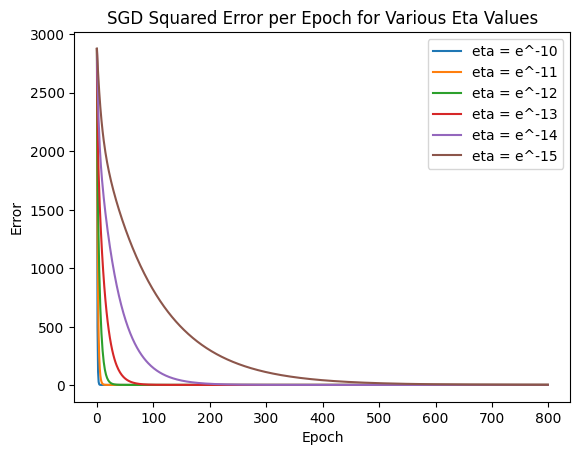

In [ ]:
N_epochs = 800

legend_handles = []
series_names = []

plt.figure()

all_losses = []

for i in range(10, 16):
    all_losses.append(losses)
    name = 'eta = e^' + str(-i)
    _, losses = SGD(X, Y, np.array([0.001] * 5), np.exp(-i), N_epochs)
    data_series, = plt.plot(losses, label=name)
    legend_handles.append(data_series)
    series_names.append(name)

plt.legend(legend_handles, series_names)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('SGD Error')
plt.show()


## Problem 3H

Provide your code for computing the least-squares analytical solution below.

In [37]:
#==============================================
# TODO: implement the least-squares
# analytical solution.
#==============================================

def least_squares(X, Y):
    '''
    Calculate the least-squares analytical solution.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
    
    Outputs:
        w: A (D, ) shaped numpy array containing the weight vector.
    '''
    
    return np.linalg.inv(X.T @ X) @ X.T @ Y

print('w = ', least_squares(X, Y))

w =  [ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
